<a href="https://colab.research.google.com/github/laggyperson/URAP-Colab-ML-Notebooks/blob/main/Xarrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

Tutorial Source: https://tutorial.xarray.dev/overview/get-started.html

# About Xarrays
Based on pandas, Xarrays allow multidimensional data where you can specify coordinates and dimensions. A little confusing to wrap your head around.

You can easily (maybe) convert pandas and numpy data into Xarrays as well as the other way around.

# Data Sets
Datasets are dictionary=like containers for Data Arrays


In [ ]:
# Loading in a dataset
# What tutorial does is download a file and uses open_dataset to open it
ds_0 = xr.tutorial.load_dataset("air_temperature", mask_and_scale=True)

# Just type out variable and it will print (python feature)
# However, will only print 1 if there are multiple
ds_0

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
# Fetching "air" Data Array
ds_0["air"]

# Can also use dot notation (ONLY if attribute isn't a keyword like 'mean')
ds_0.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [ ]:
temp = 15 + 8 * np.random.randn(2, 2, 3)

precip = 10 * np.random.rand(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, -99.23]]

lat = [[42.25, 42.21], [42.63, 42.59]]

# for real use cases, its good practice to supply array attributes such as
# units, but we won't bother here for the sake of brevity
ds = xr.Dataset(
    {
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)

df = ds.to_dataframe()
df

temperature  precipitation    lon    lat reference_time
x y time                                                               
0 0 2014-09-06    24.714526       2.698833 -99.83  42.25     2014-09-05
    2014-09-07    18.449727       0.287898 -99.83  42.25     2014-09-05
    2014-09-08    15.200721       0.747989 -99.83  42.25     2014-09-05
  1 2014-09-06    18.716952       5.718695 -99.32  42.21     2014-09-05
    2014-09-07    14.222484       9.611355 -99.32  42.21     2014-09-05
    2014-09-08    24.012482       7.998973 -99.32  42.21     2014-09-05
1 0 2014-09-06    27.603089       2.820942 -99.79  42.63     2014-09-05
    2014-09-07    18.212985       9.943902 -99.79  42.63     2014-09-05
    2014-09-08    14.457222       7.692868 -99.79  42.63     2014-09-05
  1 2014-09-06    17.707350       8.612715 -99.23  42.59     2014-09-05
    2014-09-07    12.247786       9.139050 -99.23  42.59     2014-09-05
    2014-09-08    22.371844       1.468710 -99.23  42.59     2014-09-05

# Data Arrays

Data arrays are just data + metadata. Are N-dimensional (no restrictions)

**Dimensions**: The axes of the data

In [ ]:
ds_0.air.dims

('time', 'lat', 'lon')

**Coordinates**: Data container for coordinate variables
* Seems to be similar to tick marks on a graph, except drawn at the location of each data point
* "such as 'tick labels' in a figure. THese are coordinate locations on a grid at which you have data"

In [ ]:
# This shows the time, lat, and lon values of each data point
ds_0.air.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [ ]:
# Can index coordinates too
ds_0.air['lon'] # or just use dot notation

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [ ]:
# Can also extract from using coords attribute
# Cannot use dot notation here
ds_0.coords['lat']

<xarray.DataArray 'lat' (lat: 25)>
array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5,
       45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5,
       15. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

**Attributes** : Dictionary containing arbitrary Python objects
* Limited if some attributes not writeable to file format

In [ ]:
ds_0.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [ ]:
# Adding own attributes
ds_0.air.attrs['this is confusing'] = 'very much so'
ds_0.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'this is confusing': 'very much so'}

In [ ]:
# Getting the underlying data (numpy array in this case)
# The data holds the air temperature values
ds_0.air.data

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

In [ ]:
# Checking type
type(ds_0.air.data)

numpy.ndarray

## Creating your own Data Array

In [ ]:
# Example data
np.random.seed(0)
temperature = 15 + 8 * np.random.randn(2, 2, 3)
lon = [
    [-99.83, -99.32],
    [-99.79, -99.23]
]
lat = [
    [44.25, 42.21],
    [42.63, 42.59]
]
time = pd.date_range("2014-09-06", periods=3)
reference_time = pd.Timestamp("2014-09-05")

In [ ]:
# Initializing data array
da_0 = xr.DataArray(
    data=temperature,
    dims=["x", "y", "time"],
    coords=dict(
      lon=(["x", "y"], lon),
      lat=(["x", "y"], lat),
      time=time,
      reference_time=reference_time,
    ),
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)
da_0

<xarray.DataArray (x: 2, y: 2, time: 3)>
array([[[29.11241877, 18.20125767, 22.82990387],
        [32.92714559, 29.94046392,  7.18177696]],

       [[22.60070734, 13.78914233, 14.17424919],
        [18.28478802, 16.15234857, 26.63418806]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 44.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Attributes:
    description:  Ambient temperature.
    units:        degC

In [ ]:
# Converting to data frame
df = da_0.to_dataframe(name="Average Ambient Temperature")
df

lon    lat reference_time  Average Ambient Temperature
x y time                                                                
0 0 2014-09-06 -99.83  44.25     2014-09-05                    29.112419
    2014-09-07 -99.83  44.25     2014-09-05                    18.201258
    2014-09-08 -99.83  44.25     2014-09-05                    22.829904
  1 2014-09-06 -99.32  42.21     2014-09-05                    32.927146
    2014-09-07 -99.32  42.21     2014-09-05                    29.940464
    2014-09-08 -99.32  42.21     2014-09-05                     7.181777
1 0 2014-09-06 -99.79  42.63     2014-09-05                    22.600707
    2014-09-07 -99.79  42.63     2014-09-05                    13.789142
    2014-09-08 -99.79  42.63     2014-09-05                    14.174249
  1 2014-09-06 -99.23  42.59     2014-09-05                    18.284788
    2014-09-07 -99.23  42.59     2014-09-05                    16.152349
    2014-09-08 -99.23  42.59     2014-09-05                    26.634188

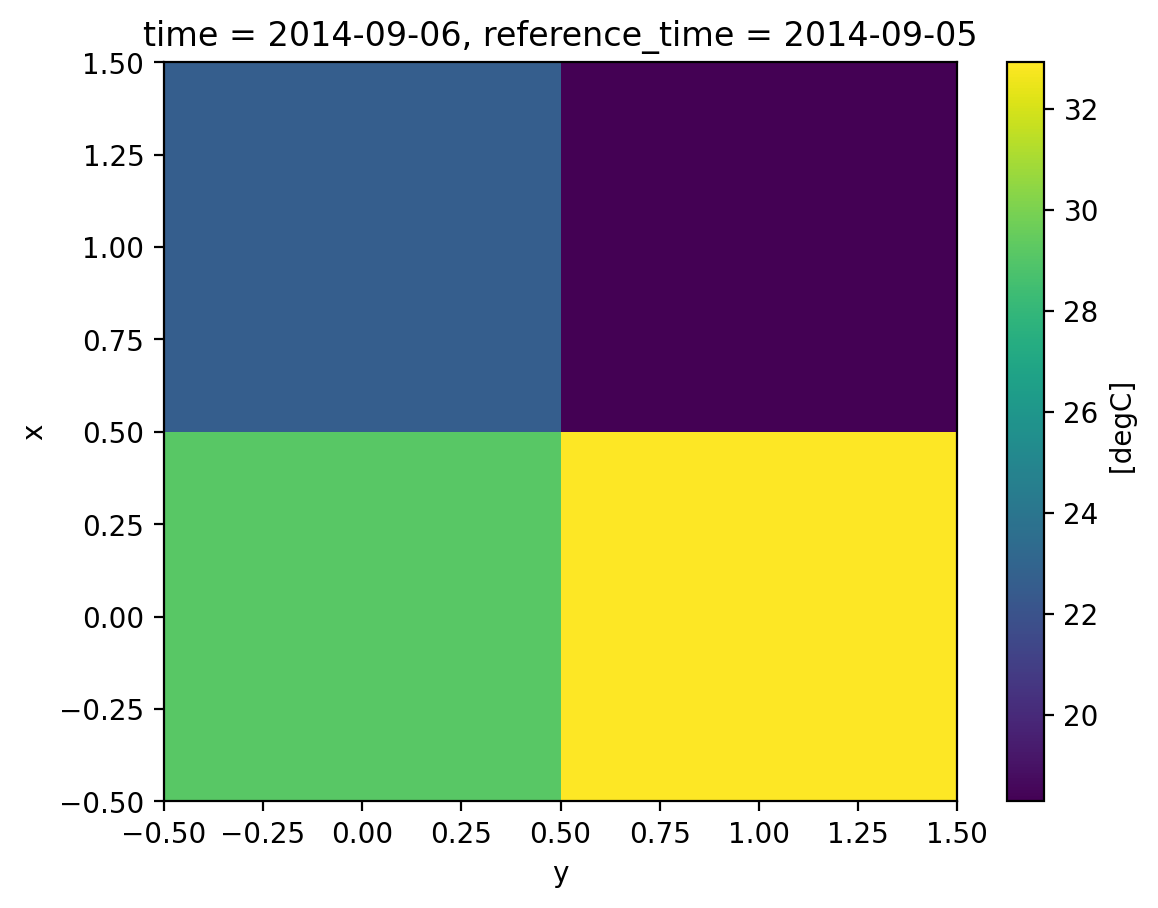

In [ ]:
# Plotting
da_0.sel(time="2014-09-06").plot()

# Analysis of Data

Xarray allows attributes and labels, making it easier to analyze data

### Without Xarray

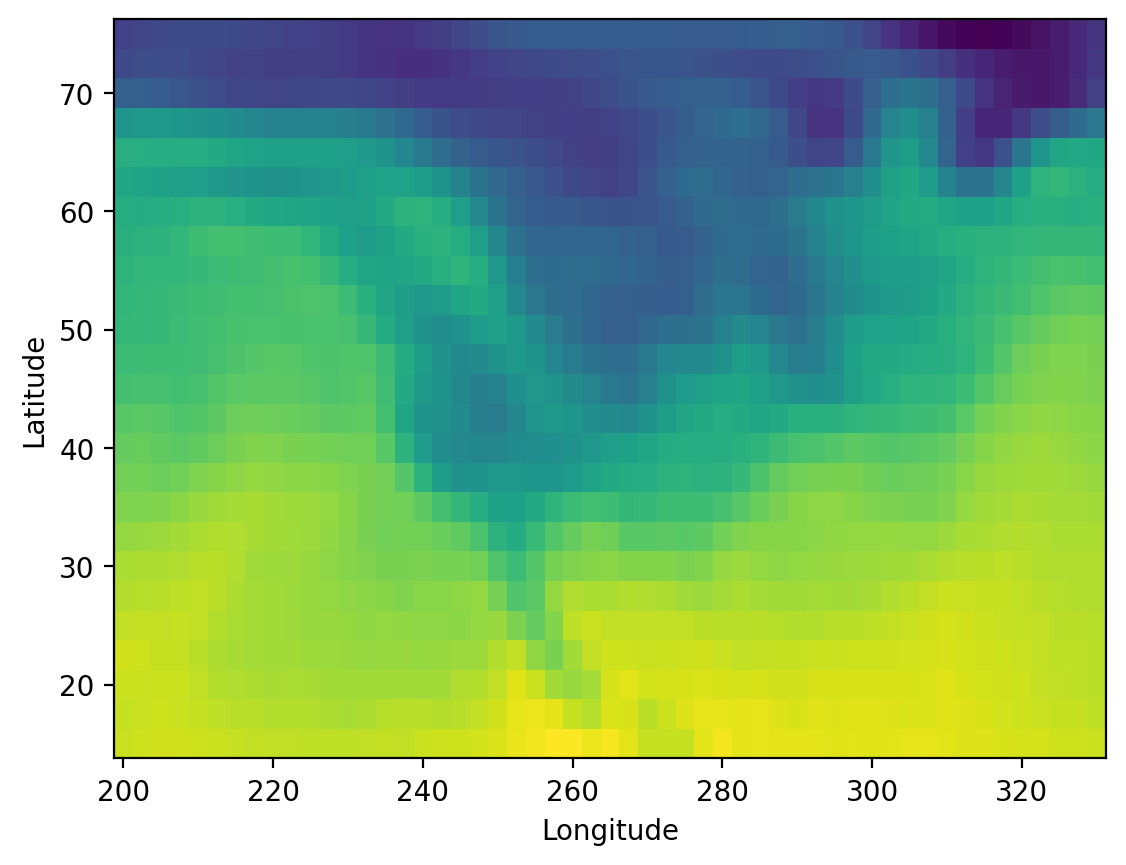

In [ ]:
# Plotting the first time step
# All numpy arrays here
lat = ds_0.air.lat.data
lon = ds_0.air.lon.data
temp = ds_0.air.data

plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]); # Grabbing the first time step from the temp data
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
temp.mean(axis=1) # Will get some confusing output

array([[279.39798, 279.6664 , 279.66122, ..., 279.9508 , 280.31522,
        280.6624 ],
       [279.05722, 279.538  , 279.7296 , ..., 279.77563, 280.27002,
        280.79764],
       [279.0104 , 279.2808 , 279.5508 , ..., 279.682  , 280.19763,
        280.81403],
       ...,
       [279.63   , 279.934  , 280.534  , ..., 279.802  , 280.346  ,
        280.77798],
       [279.398  , 279.66602, 280.31796, ..., 279.766  , 280.34198,
        280.834  ],
       [279.27   , 279.354  , 279.88202, ..., 279.42596, 279.96997,
        280.48196]], dtype=float32)

### WIth Xarray

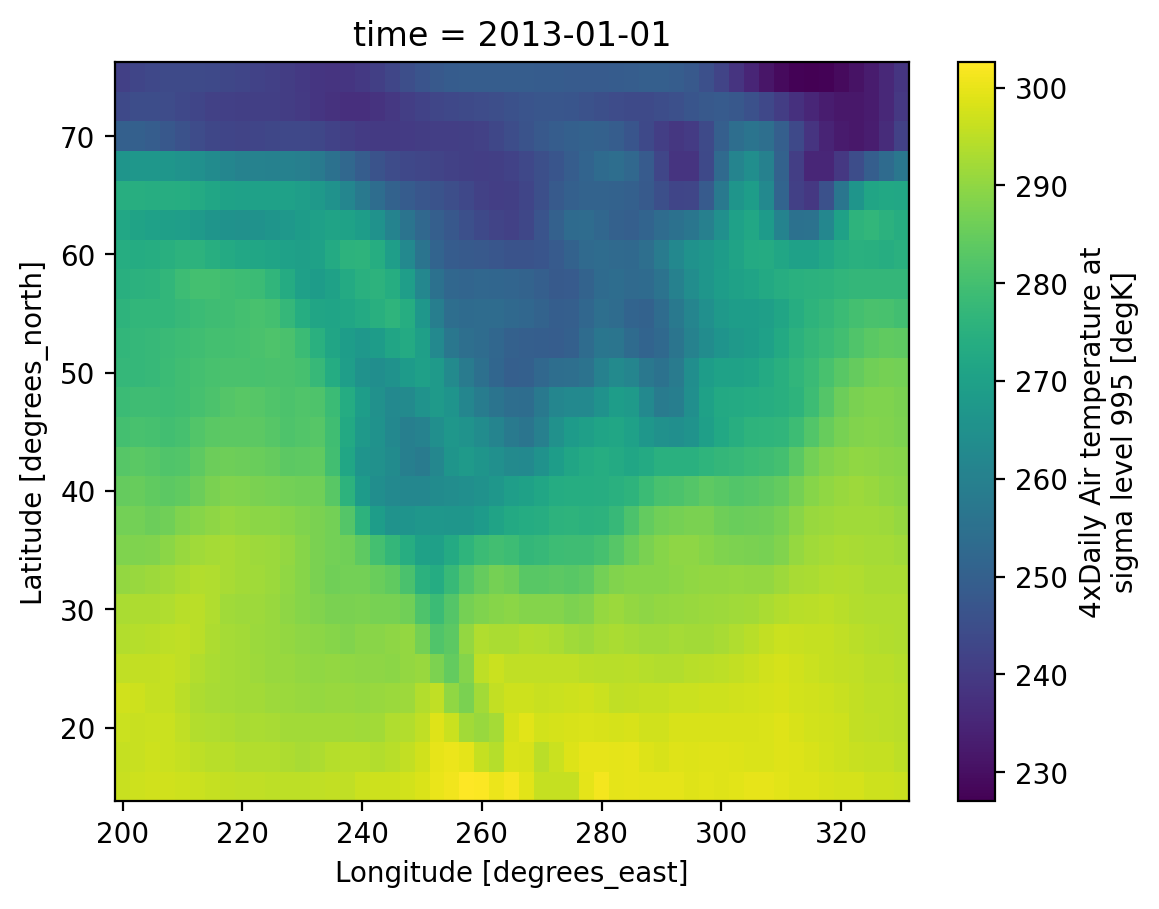

In [ ]:
# Command is pretty readable
ds_0.air.isel(time=0).plot(x='lon')

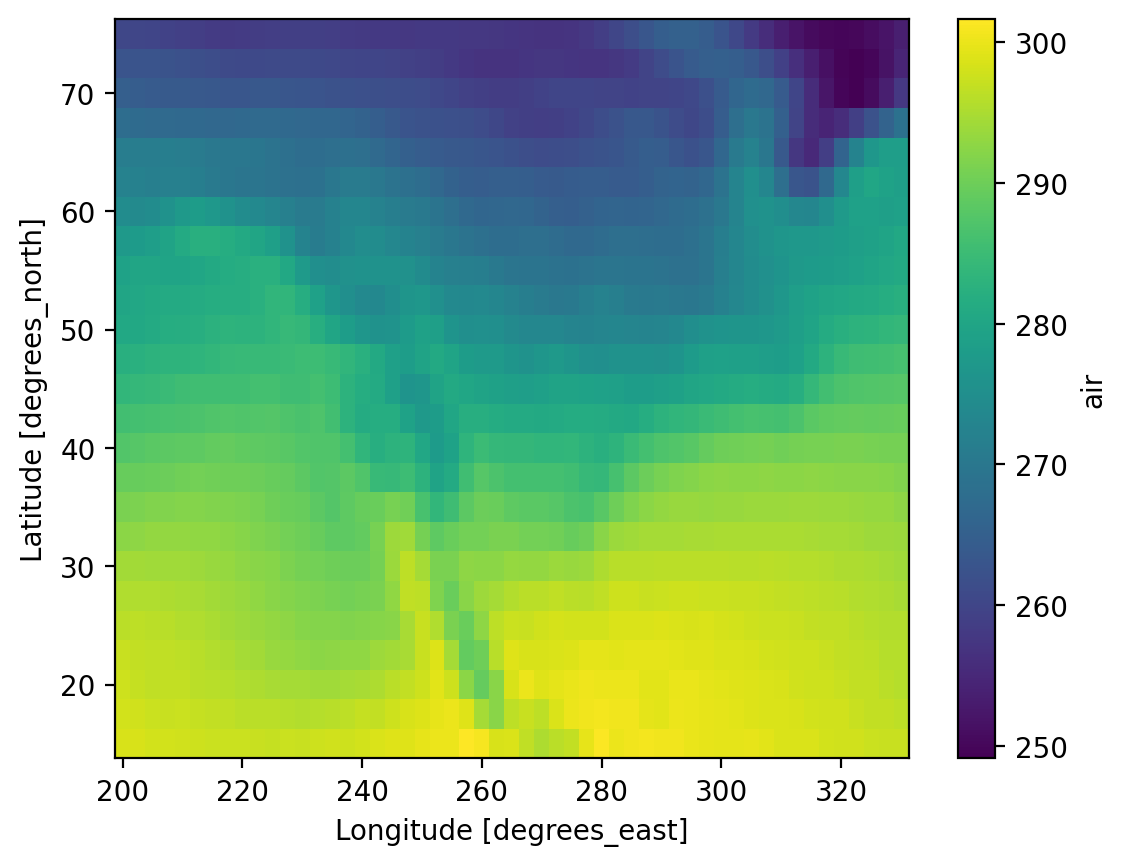

In [ ]:
# Can get the mean + a plot
ds_0.air.mean(dim='time').plot(x='lon')

# Indexing

Two types:

1. Label based indexing with `.sel`
2. Position based indexing with `.isel`

### Label Based indexing

In [ ]:
# Pulling data from specific date (will notice that time = 124, no longer 2920)
ds_0.sel(time="2013-05")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 124, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 298.2 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
# Slicing of data
ds_0.sel(time=slice("2013-05", "2013-07"))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 368, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 299.4 299.5 299.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
# Can also go more broad in time
ds_0.sel(time='2013')

<xarray.Dataset>
Dimensions:  (lat: 25, time: 1460, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.1 295.1 294.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
# Can use "nearest" indexing which returns the datapoints closest to specified value (notice how longitude is no longer showing up)
ds_0.sel(lon=240.2, method='nearest')

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    lon      float32 240.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float32 239.6 237.2 240.1 249.0 ... 294.8 296.9 298.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
# Can do this for multiple points and dimensions
ds_0.sel(lon=[240.124, 234], lat=[40.3, 50.3], method='nearest')

<xarray.Dataset>
Dimensions:  (lat: 2, time: 2920, lon: 2)
Coordinates:
  * lat      (lat) float32 40.0 50.0
  * lon      (lon) float32 240.0 235.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 268.1 283.0 265.5 ... 285.2 256.8 268.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Position Based Indexing

In [ ]:
# Similar to using indices for numpy arrays, but with named dimensions
ds_0.air.isel(time=0, lat=2, lon=3)

<xarray.DataArray 'air' ()>
array(247.5, dtype=float32)
Coordinates:
    lat      float32 70.0
    lon      float32 207.5
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:          4xDaily Air temperature at sigma level 995
    units:              degK
    precision:          2
    GRIB_id:            11
    GRIB_name:          TMP
    var_desc:           Air temperature
    dataset:            NMC Reanalysis
    level_desc:         Surface
    statistic:          Individual Obs
    parent_stat:        Other
    actual_range:       [185.16 322.1 ]
    this is confusing:  very much so

In [ ]:
# Can also slice
ds_0.air.isel(lat=slice(10))

<xarray.DataArray 'air' (time: 2920, lat: 10, lon: 53)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [274.79   , 275.19998, 275.6    , ..., 277.19998, 277.     ,
         277.     ],
        [275.9    , 276.9    , 276.9    , ..., 280.9    , 280.5    ,
         279.69998],
        [276.69998, 277.4    , 277.69998, ..., 283.29   , 284.1    ,
         283.9    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [275.59   , 276.29   , 277.49   , ..., 275.19   , 275.79   ,
         276.59   ],
        [276.88998, 277.88998, 278.69   , ..., 273.59   , 274.29   ,
         275.29   ],
        [276.79   , 277.29   , 278.29   , ..., 274.19   , 275.38998,
         276.88998]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [274.29   , 274.49   , 275.59   , ..., 274.69   , 274.99   ,
         275.38998],
        [276.79   , 277.49   , 277.99   , ..., 273.19   , 273.59   ,
         274.19   ],
        [276.88998, 277.29   , 277.59   , ..., 273.79   , 274.99   ,
         276.19   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:          4xDaily Air temperature at sigma level 995
    units:              degK
    precision:          2
    GRIB_id:            11
    GRIB_name:          TMP
    var_desc:           Air temperature
    dataset:            NMC Reanalysis
    level_desc:         Surface
    statistic:          Individual Obs
    parent_stat:        Other
    actual_range:       [185.16 322.1 ]
    this is confusing:  very much so

# Concepts for Computation

Tutorial goes on a trope about computing average air temperature per unit surface area

Note: Using numpy functions on xarrays returns xarrays

In [ ]:
# This section calculates the length values of each change in longitude and latitude since the length scale of longitude changes as you move across the latitudes
# Earth's avg radius in meters
R = 6.371e6

# Coordinate spacing for dataset is 2.5 x 2.5 degrees
d_phi = np.deg2rad(2.5)
d_lamb = np.deg2rad(2.5)

dlat = R * d_phi * xr.ones_like(ds_0.air.lon) # Creates data of all ones with one_like; same dimensions as provided array
dlon = R * d_lamb * np.cos(np.deg2rad(ds_0.air.lat)) # Using numpy functions on Xarrays returns xarrays

In [ ]:
# Multiplying DataArrays with different labels will result in 2D data arrays via broadcasting
# Avoids reshaping like in numpy
# Alignment is auto-completed so it matches with the original data (i.e. the coordinates for the latitude and longitude are the same)
cell_area = dlon * dlat
cell_area

<xarray.DataArray (lat: 25, lon: 53)>
array([[2.0000748e+10, 2.0000748e+10, 2.0000748e+10, ..., 2.0000748e+10,
        2.0000748e+10, 2.0000748e+10],
       [2.3237628e+10, 2.3237628e+10, 2.3237628e+10, ..., 2.3237628e+10,
        2.3237628e+10, 2.3237628e+10],
       [2.6430274e+10, 2.6430274e+10, 2.6430274e+10, ..., 2.6430274e+10,
        2.6430274e+10, 2.6430274e+10],
       ...,
       [7.2616575e+10, 7.2616575e+10, 7.2616575e+10, ..., 7.2616575e+10,
        7.2616575e+10, 7.2616575e+10],
       [7.3700336e+10, 7.3700336e+10, 7.3700336e+10, ..., 7.3700336e+10,
        7.3700336e+10, 7.3700336e+10],
       [7.4643800e+10, 7.4643800e+10, 7.4643800e+10, ..., 7.4643800e+10,
        7.4643800e+10, 7.4643800e+10]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [ ]:
# Checking alignment is important, else you will get non existent numbers
xr.align(cell_area, ds_0.air, join='exact')

# Bad cell alignment
cell_area_bad = cell_area.copy(deep=True)
cell_area_bad["lat"] = cell_area.lat + 1e-5
# xr.align(cell_area_bad, ds_0.air, join='exact') # This statement errors

## High Level Computations
* `groupby` : Bins data into groups and reduce
* `resample` : Specialized groupby for time axes by down or up sampling data
* `rolling` : does rolling windows on data like rolling mean
* `coarsen` : downsample data
* `weighted` : weight data before reducing

### Groupby

In [ ]:
# Seasonal groups
ds_0.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [ ]:
# Can also do seasonal means
seasonal_mean = ds_0.groupby("time.season").mean() # Will put things in alphabetical order

# Can specify order of labels
seasonal_mean = seasonal_mean.sel(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.0 247.0 246.7 ... 299.4 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

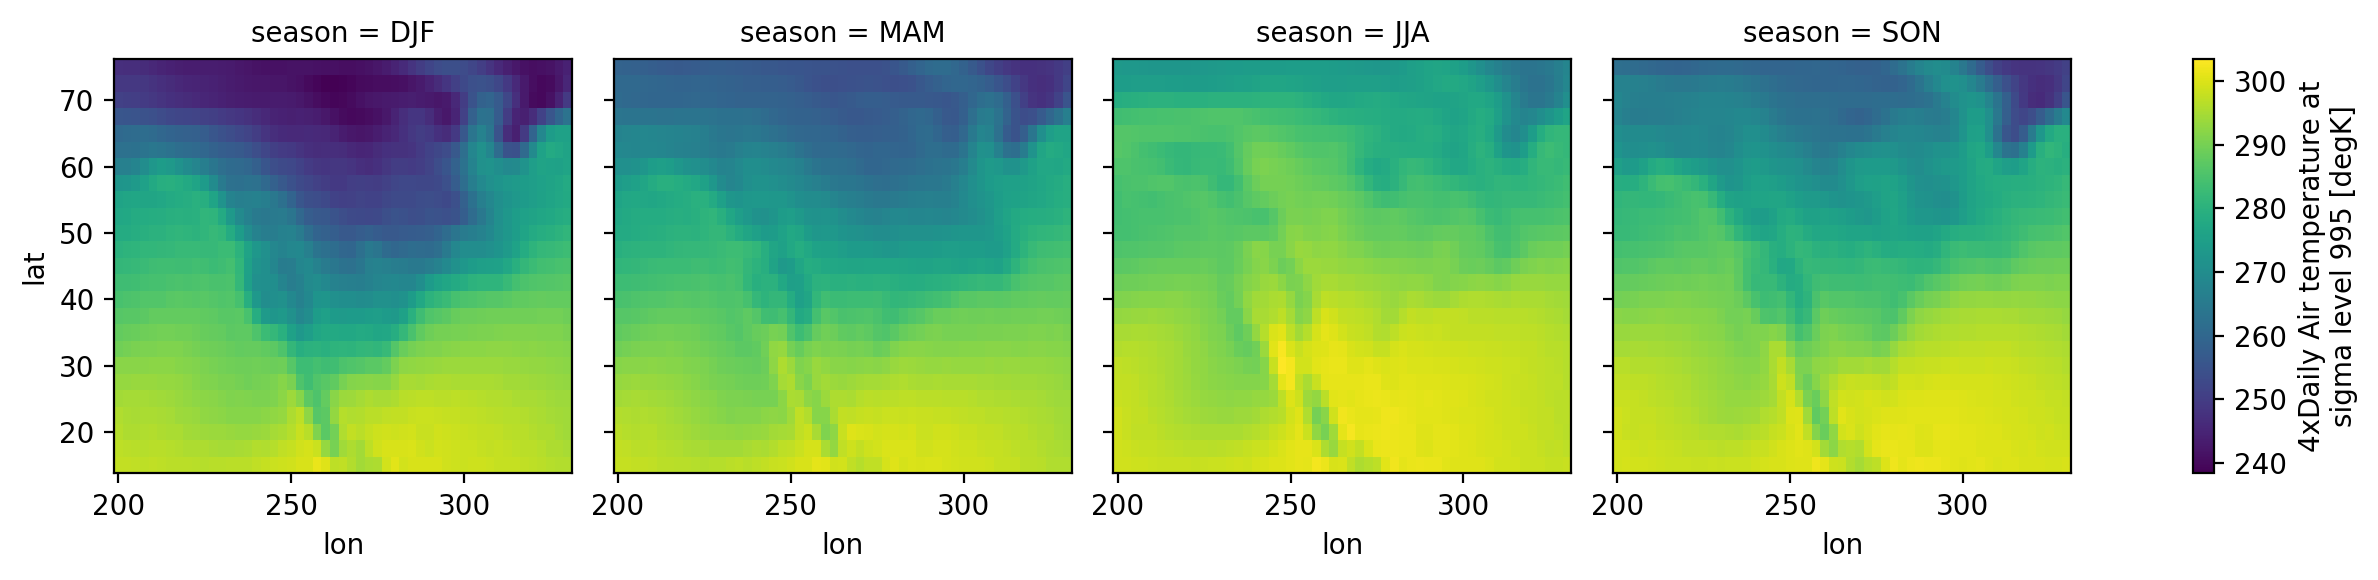

In [ ]:
# Plotting
seasonal_mean.air.plot(col='season')

### Resample

In [ ]:
# Resampling to monthly frequency
ds_0.resample(time="M").mean()

<xarray.Dataset>
Dimensions:  (lat: 25, time: 24, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
Data variables:
    air      (time, lat, lon) float32 244.5 244.7 244.7 ... 297.7 297.7 297.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Weighted

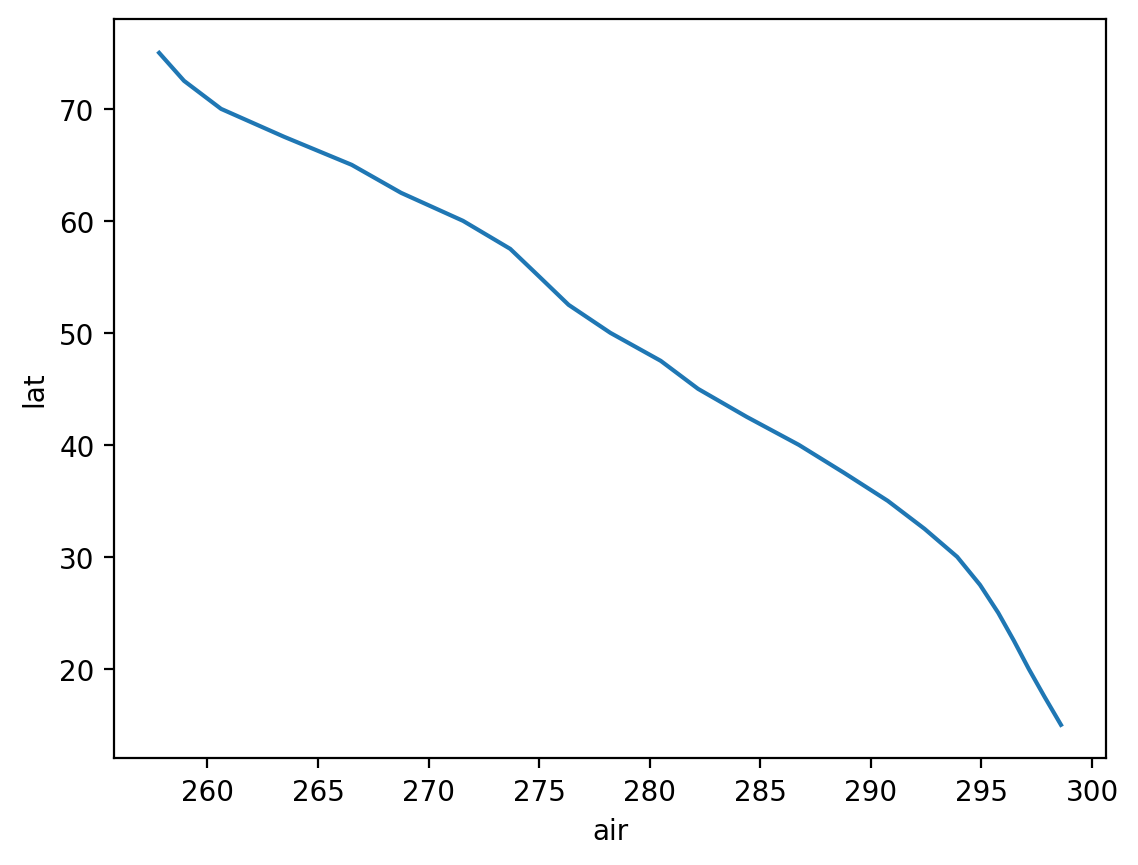

In [ ]:
# Weight cells by cell_area and take mean over (time, lon)
ds_0.weighted(cell_area).mean(["lon", "time"]).air.plot(y="lat")

# Visualizations

Mostly the `.plot()` function

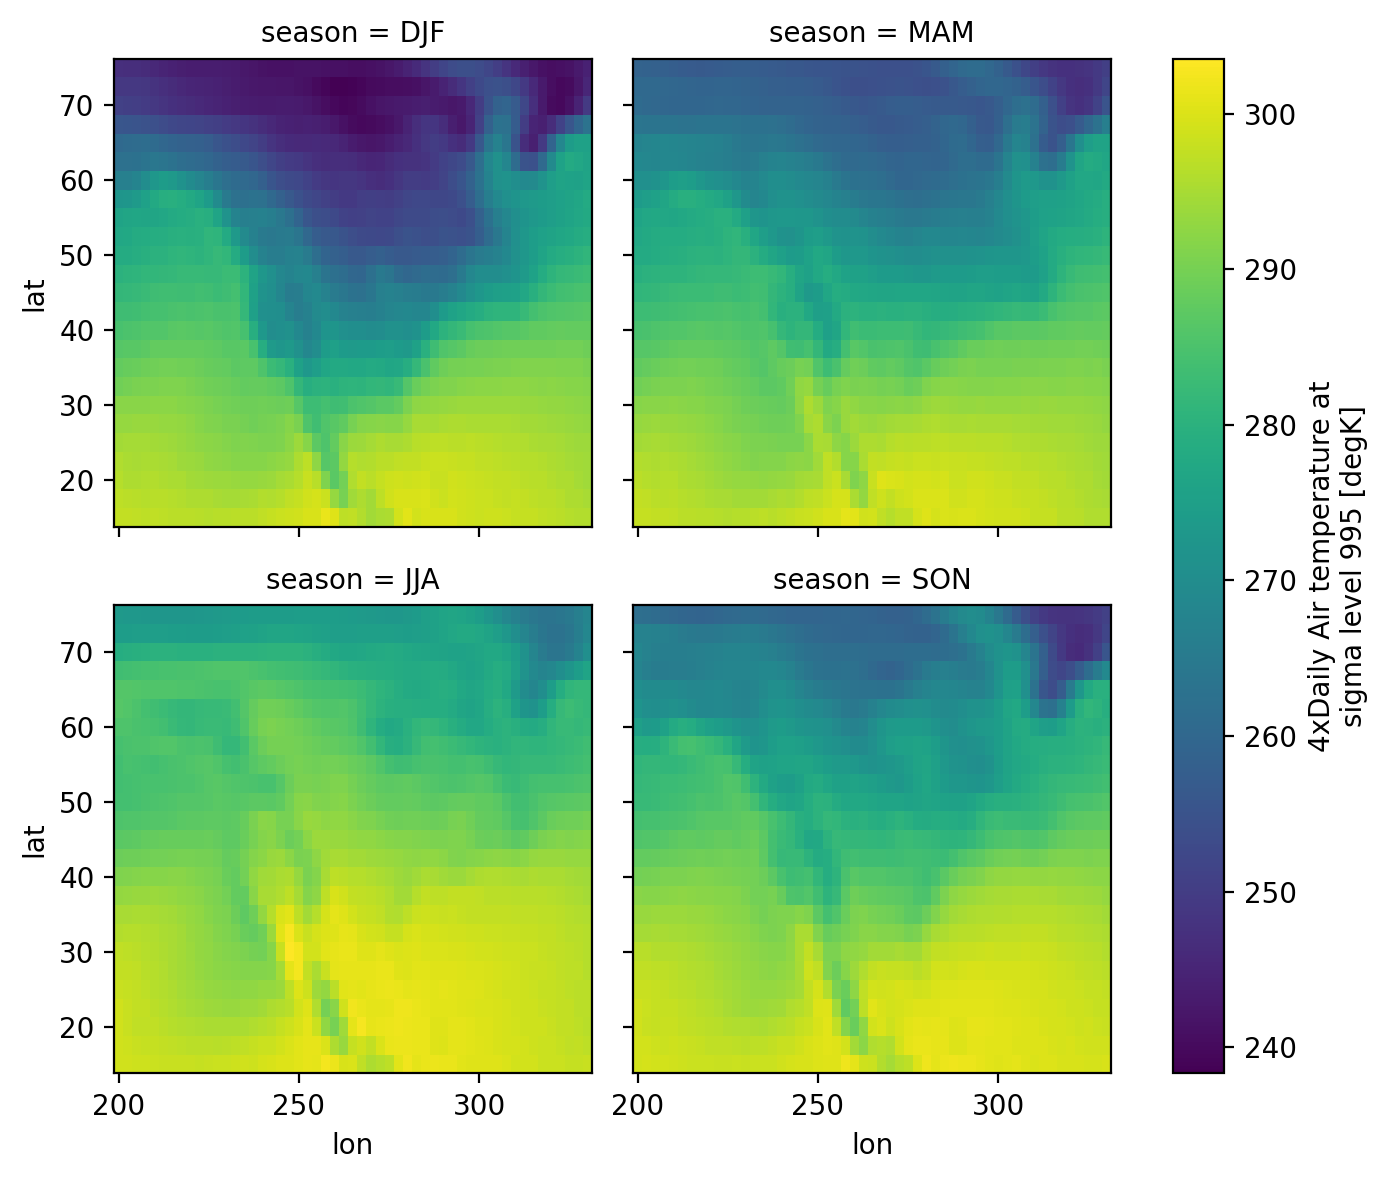

In [ ]:
# facet the seasonal_mean
seasonal_mean.air.plot(col="season", col_wrap=2)

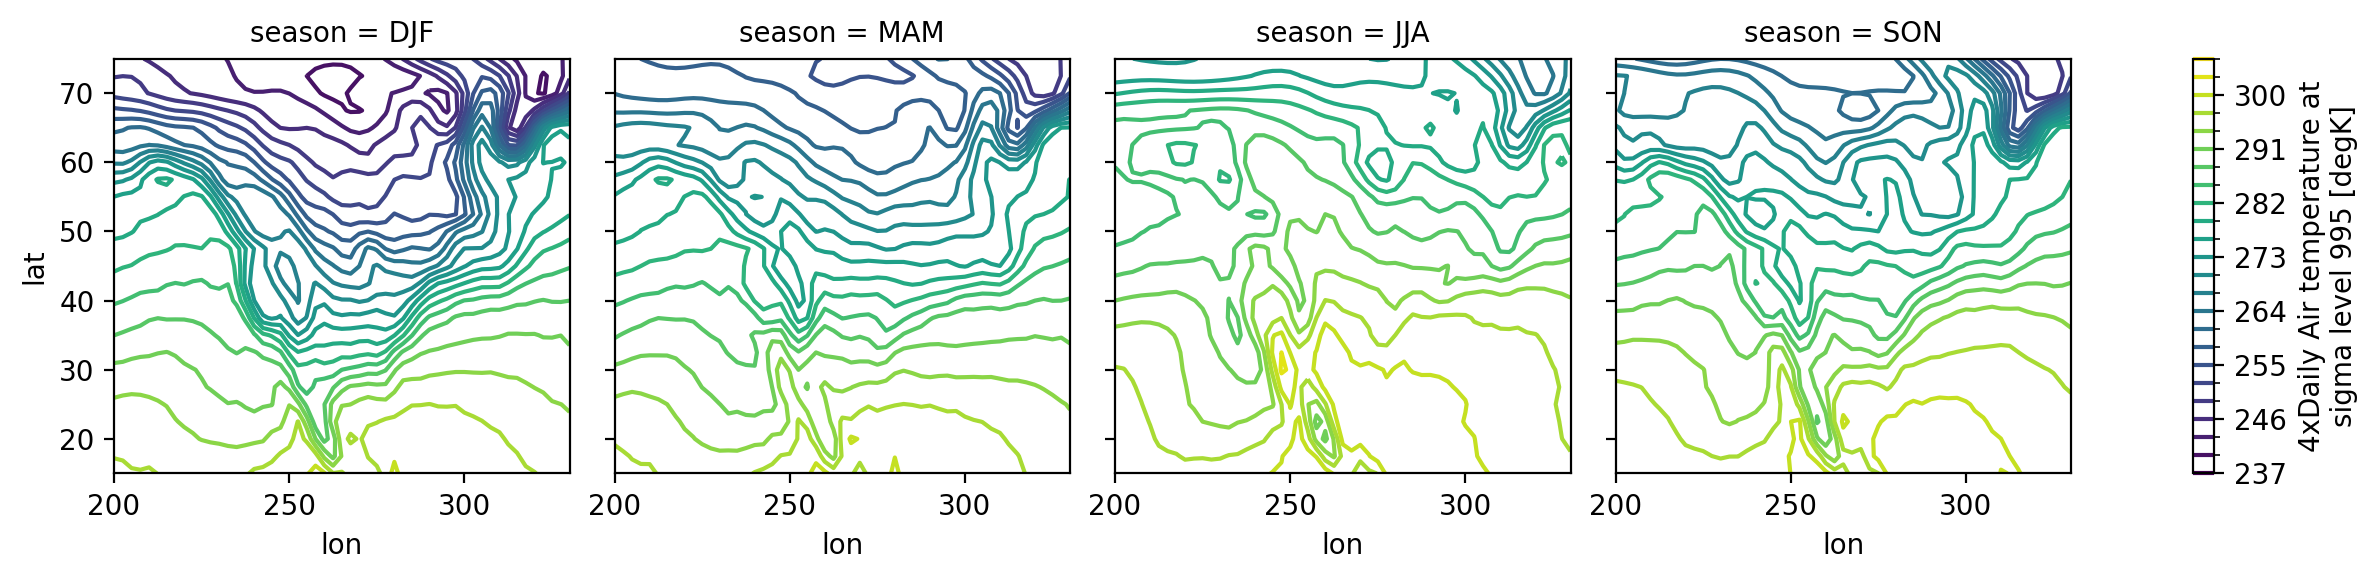

In [ ]:
# Contours
seasonal_mean.air.plot.contour(col="season", levels=25, add_colorbar=True)

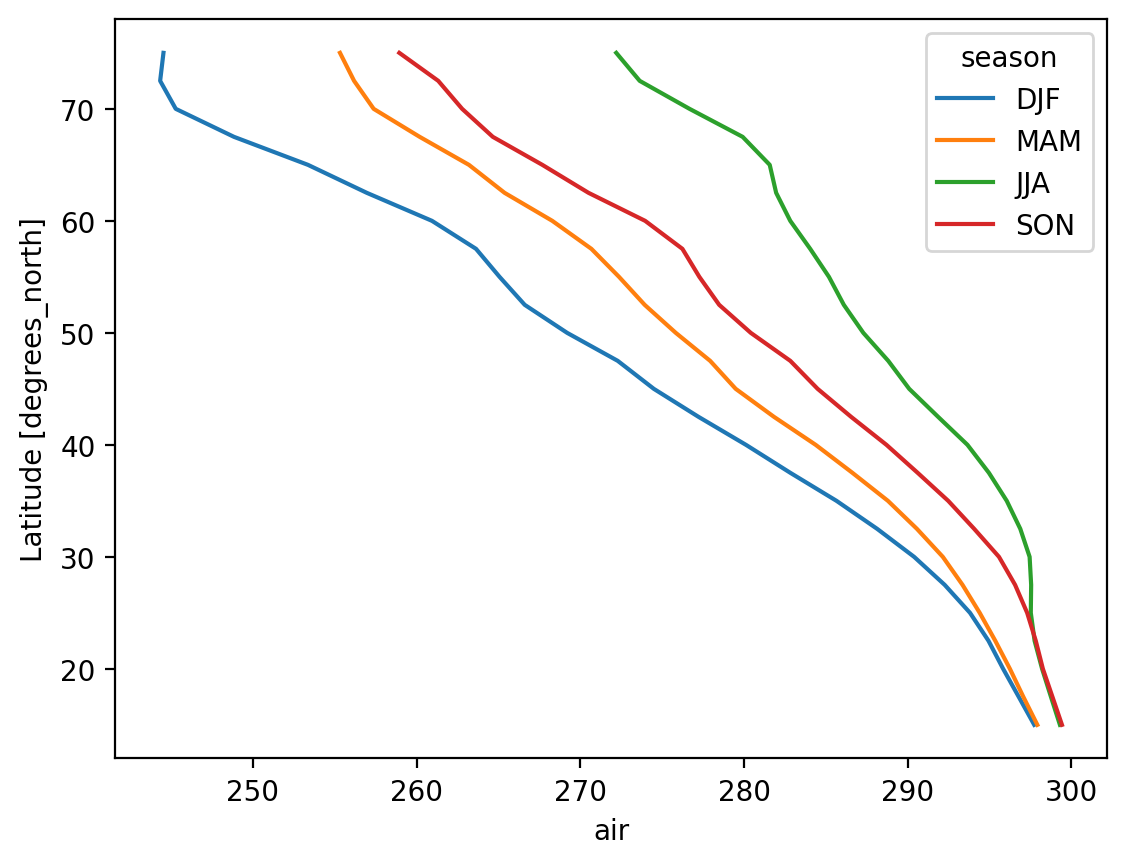

In [ ]:
# Can plot with lines too
seasonal_mean.air.mean("lon").plot.line(hue="season", y="lat")

# Reading and Writing to Files

In [ ]:
# Will have to find suitable data format

# Pandas and Xarray

In [ ]:
# Converting Xarray to pandas data frame (very simple)
df = ds_0.isel(time=slice(10)).to_dataframe()
df

air
lat  time                lon              
75.0 2013-01-01 00:00:00 200.0  241.199997
                         202.5  242.500000
                         205.0  243.500000
                         207.5  244.000000
                         210.0  244.099991
...                                    ...
15.0 2013-01-03 06:00:00 320.0  297.000000
                         322.5  297.290009
                         325.0  296.899994
                         327.5  296.790009
                         330.0  297.100006

[13250 rows x 1 columns]

In [ ]:
# Converting back
df.to_xarray()

<xarray.Dataset>
Dimensions:  (lat: 25, time: 10, lon: 53)
Coordinates:
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-03T06:00:00
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    air      (lat, time, lon) float32 241.2 242.5 243.5 ... 296.9 296.8 297.1

# Experimentation

In [ ]:
# Pulled from some website. Doesn't really make sense to me and it looks ugly
xarray_3d = xr.Dataset(
    {"Speed": (("time", "vehicle"), np.random.randn(2, 4))},
    coords={
        "time": [2021, 2022],
        "vehicle": ["Veh 1", "Veh 2", "Veh 3", "Veh 4"],
        "acceleration": ("time", np.random.randn(2)),
        "neighbors": 50,
    },
)

df_3d = xarray_3d.to_dataframe()

print(df_3d)

                 Speed  acceleration  neighbors
time vehicle                                   
2021 Veh 1    1.182038     -0.391537         50
     Veh 2   -0.328801     -0.391537         50
     Veh 3   -0.198777     -0.391537         50
     Veh 4    0.488571     -0.391537         50
2022 Veh 1    0.529877     -0.235860         50
     Veh 2   -1.723959     -0.235860         50
     Veh 3   -0.131886     -0.235860         50
     Veh 4   -0.062924     -0.235860         50


In [ ]:
# Using np.array to organize things first
# Dim 1: Time
# Dim 2: Vehicles
# Dim 3: The different params
np_data = np.array(
    [
        [
            [9.81, 2.2, 'r', 5.3],
            [21.98, 1.9, 'r', 5.3],
            [1, 3, 'g', 10.4],
            [13, 1.2, 'y', 4.2]
        ],
        [
            [11.23, 0.9, 'r', 3.3],
            [23.2, -2.3, 'r', 3.3],
            [4.5, 2.3, 'g', 8.6],
            [15, -2.3, 'y', 0.7]
        ],
        [
            [8.7, -2.2, 'r', 0.1],
            [18.3, -1.2, 'r', 0.1],
            [8.2, 1.2, 'g', 5.3],
            [0, 0, 'r', 18.8]
        ]
    ]
)

# Creating coordinates
veh_id = np.array(["Veh 1", 'Veh 2', 'Veh 3', 'Veh 4'])
time = np.arange(3)
other= np.array(["Speed", "Accel", "TL Phase", "Time to Switch"])



# Creating xarray
xarr = xr.DataArray(
    data=np_data,
    dims=["Time", "Veh ID", "Data"],
    coords={
      "Time": time,
      "Veh ID": veh_id,
      "Data": other
    }
)

df = xarr.to_dataframe(name="Sim Data 1")

In [ ]:
df.loc[1].loc["Veh 1"]

,Sim Data 1
Data,
Speed,11.23
Accel,0.9
TL Phase,r
Time to Switch,3.3


In [ ]:
# Testing df exporting
df.to_csv("test_4.csv", index="False")
df_load = pd.read_csv("test_4.csv")
#print(df_load)

In [ ]:
# Checking access
df_load.loc[0]

Time              0
Veh ID        Veh 1
Data          Speed
Sim Data 1     9.81
Name: 0, dtype: object

In [ ]:
selection = xarr.sel(indexers={"Veh ID": "Veh 4"})
np_arr = selection.sel(indexers={"Time": 1, "Data":"Speed"}).data

In [ ]:
print(np_arr)

15


In [ ]:
xarr.sel(indexers={"Data": "Speed"}).data

array([['9.81', '21.98', '1', '13'],
       ['11.23', '23.2', '4.5', '15'],
       ['8.7', '18.3', '8.2', '0']], dtype='<U32')

In [ ]:
# Checking Dataframe back to xarray
xarr_load = df_load.to_xarray()
# xarr_load Not what I want

In [ ]:
xarr.to_netcdf("test.nc")
xarr_load = xr.open_dataset("test.nc")
xarr_load

<xarray.Dataset>
Dimensions:                        (Data: 4, Veh ID: 4, Time: 3)
Coordinates:
  * Data                           (Data) object 'Speed' ... 'Time to Switch'
  * Veh ID                         (Veh ID) object 'Veh 1' 'Veh 2' ... 'Veh 4'
  * Time                           (Time) int32 0 1 2
Data variables:
    __xarray_dataarray_variable__  (Time, Veh ID, Data) object ...

In [ ]:
xds = xr.Dataset({"data":xarr})
xds["data"]

<xarray.DataArray 'data' (Time: 3, Veh ID: 4, Data: 4)>
array([[['9.81', '2.2', 'r', '5.3'],
        ['21.98', '1.9', 'r', '5.3'],
        ['1', '3', 'g', '10.4'],
        ['13', '1.2', 'y', '4.2']],

       [['11.23', '0.9', 'r', '3.3'],
        ['23.2', '-2.3', 'r', '3.3'],
        ['4.5', '2.3', 'g', '8.6'],
        ['15', '-2.3', 'y', '0.7']],

       [['8.7', '-2.2', 'r', '0.1'],
        ['18.3', '-1.2', 'r', '0.1'],
        ['8.2', '1.2', 'g', '5.3'],
        ['0', '0', 'r', '18.8']]], dtype='<U32')
Coordinates:
  * Time     (Time) int64 0 1 2
  * Veh ID   (Veh ID) <U5 'Veh 1' 'Veh 2' 'Veh 3' 'Veh 4'
  * Data     (Data) <U14 'Speed' 'Accel' 'TL Phase' 'Time to Switch'

In [ ]:
xds.to_netcdf("test.nc")
xds_load = xr.open_dataset("test.nc")
float(xds_load["data"].data[0][0][0])

9.81

In [ ]:
xr_load = xr.open_dataset("G16_100v_noLC.nc")
xr_load

<xarray.Dataset>
Dimensions:      (Veh IDs: 100, Data Labels: 17, Time: 15)
Coordinates:
  * Veh IDs      (Veh IDs) object 'f_0.0' 'f_0.1' 'f_0.2' ... 'f_9.5' 'f_9.6'
  * Data Labels  (Data Labels) object 'Speed' 'Max Speed' ... 'Passed Point'
  * Time         (Time) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 5.0 5.5 6.0 6.5 7.0
Data variables:
    Data         (Time, Veh IDs, Data Labels) object ...

In [ ]:
xr_load["Data"]

<xarray.DataArray 'Data' (Time: 15, Veh IDs: 100, Data Labels: 17)>
[25500 values with dtype=object]
Coordinates:
  * Veh IDs      (Veh IDs) object 'f_0.0' 'f_0.1' 'f_0.2' ... 'f_9.5' 'f_9.6'
  * Data Labels  (Data Labels) object 'Speed' 'Max Speed' ... 'Passed Point'
  * Time         (Time) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 5.0 5.5 6.0 6.5 7.0

In [ ]:
xr_load["Data"].data

array([[['8.579280384781244', '18.9528', '-1.9375424002765307', ...,
         '0.4099743375474239', '0.16421262371344003', '1'],
        ['12.509355926623137', '16.571184', '1.9559576227096862', ...,
         '0.4099743375474239', '0.16421262371344003', '1'],
        ['6.84864359967216', '7.802332000000001', '2.383668977627531',
         ..., '-1', '-1', '1'],
        ...,
        ['0.0', '17.077188', '0.0', ..., '-1', '-1', '1'],
        ['0.0', '18.27336', '0.0', ..., '-1', '-1', '1'],
        ['0.0', '19.617935999999997', '0.0', ..., '-1', '-1', '1']],

       [['7.255905967447945', '18.9528', '-2.6467488346665977', ...,
         '0.952268270508108', '1.0845878659213684', '1'],
        ['13.559207307109645', '16.571184', '2.099702760973017', ...,
         '0.952268270508108', '1.0845878659213684', '1'],
        ['7.340776740977139', '7.802332000000001', '0.9842662826099584',
         ..., '-1', '-1', '1'],
        ...,
        ['0.0', '17.077188', '0.0', ..., '-1', '-1', '1'],
     

In [ ]:
xr_load["Data"][0][0]

<xarray.DataArray 'Data' (Data Labels: 17)>
array(['8.579280384781244', '18.9528', '-1.9375424002765307',
       '46.14404056196207', '3', '2.0', '3', '5.277327981982789',
       '2.045233973586438', '-0.6541180299286872', '-1', '-1', '-1',
       '1.4770270636824279', '0.4099743375474239', '0.16421262371344003', '1'],
      dtype=object)
Coordinates:
    Veh IDs      <U5 'f_0.0'
  * Data Labels  (Data Labels) object 'Speed' 'Max Speed' ... 'Passed Point'
    Time         float64 0.0

In [ ]:
xds_new = xr.Dataset({"data": xarr})
df_ds = xds_new.to_dataframe()

df_ds.to_csv("test.csv")
df_ds = pd.read_csv("test.csv")
print(df_ds)

    Time Veh ID            Data   data
0      0  Veh 1           Speed   9.81
1      0  Veh 1           Accel    2.2
2      0  Veh 1        TL Phase      r
3      0  Veh 1  Time to Switch    5.3
4      0  Veh 2           Speed  21.98
5      0  Veh 2           Accel    1.9
6      0  Veh 2        TL Phase      r
7      0  Veh 2  Time to Switch    5.3
8      0  Veh 3           Speed      1
9      0  Veh 3           Accel      3
10     0  Veh 3        TL Phase      g
11     0  Veh 3  Time to Switch   10.4
12     0  Veh 4           Speed     13
13     0  Veh 4           Accel    1.2
14     0  Veh 4        TL Phase      y
15     0  Veh 4  Time to Switch    4.2
16     1  Veh 1           Speed  11.23
17     1  Veh 1           Accel    0.9
18     1  Veh 1        TL Phase      r
19     1  Veh 1  Time to Switch    3.3
20     1  Veh 2           Speed   23.2
21     1  Veh 2           Accel   -2.3
22     1  Veh 2        TL Phase      r
23     1  Veh 2  Time to Switch    3.3
24     1  Veh 3          

In [ ]:
xarr_2 = xr.DataArray(
    data=np.random.rand(2, 3)
)
xarr_2.to_netcdf("test.nc")
xarr_2_load = xr.open_dataarray("test.nc")
xarr_2

<xarray.DataArray (dim_0: 2, dim_1: 3)>
array([[0.85322054, 0.16560648, 0.55587273],
       [0.95947334, 0.32003091, 0.98867229]])
Dimensions without coordinates: dim_0, dim_1